##### Importing Libraries

In [1]:
import torchvision.models as tv_models
from torchsummary import summary
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import torch

##### a) Load the randomly initialized network. How many features are in the input of the last layer?

In [2]:
alexnet_weights =  tv_models.alexnet()
print(alexnet_weights)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

##### b) Run the Corgi image through the network. What are the top predictions?

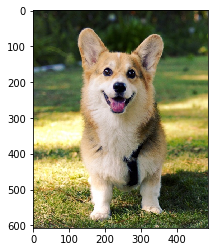

In [3]:
# Reading the corgi image
corgi_image = Image.open('WelshCorgi.jpeg')
plt.imshow(corgi_image)

In [4]:
#Resize Image
resized_img = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# Transform the Corgi image
transformed_img = resized_img(corgi_image)
# Batch Input
input_alexnet = torch.unsqueeze(transformed_img,0)
# output from alexnet
alexnet_weights.eval()
output_classes = alexnet_weights(input_alexnet)
# Read labels from file
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]
_, index = torch.max(output_classes, 1)
per_score = (torch.nn.functional.softmax(output_classes, dim=1)[0] * 100)
## Top predictors
_, indices = torch.sort(output_classes, descending=True)
[(classes[idx], per_score[idx].item()) for idx in indices[0][:5]]

[('936, head_cabbage', 0.1028067097067833),
 ('201, silky_terrier', 0.10253457725048065),
 ('821, steel_arch_bridge', 0.10241543501615524),
 ('186, Norwich_terrier', 0.10241003334522247),
 ('561, forklift', 0.10233860462903976)]

#### c)	Reload the network with pre-trained weights. Those weights correspond to training the network with the Imagenet dataset. What are the top predictions? What is the probability of the top prediction?

In [5]:
alexnet_pretd = tv_models.alexnet(pretrained=True)
alexnet_pretd.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
## Top predictors
output_pred = alexnet_pretd(input_alexnet)
_, trained_index = torch.sort(output_pred, descending=True)
per_trained = torch.nn.functional.softmax(output_pred, dim=1)[0] * 100
[(classes[idx], per_trained[idx].item()) for idx in trained_index[0][:5]]

[('259, Pomeranian', 89.2624282836914),
 ('260, chow', 10.571438789367676),
 ('223, schipperke', 0.04867025092244148),
 ('244, Tibetan_mastiff', 0.042786747217178345),
 ('226, briard', 0.017885619774460793)]